<a href="https://colab.research.google.com/github/Kushalpatel3121/ML-Labs/blob/main/ML_Lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 100,centers=3,n_features=2,cluster_std=0.2,random_state=0)

In [ ]:
#Scatter plot of the data points
import matplotlib.pyplot as plt
%matplotlib inline

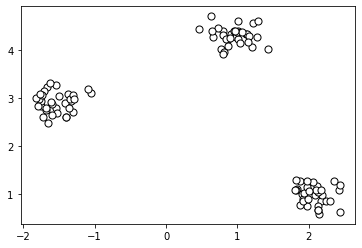

In [ ]:
plt.scatter(X[:,0],X[:,1], c='white',marker='o',edgecolor='black',s=50)
plt.show()

In [ ]:
#using scikit-learn to perform K-means clustering
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters=3, init='random',n_init=10,max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

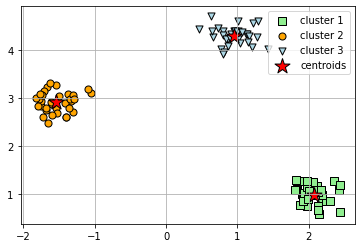

In [ ]:
plt.scatter(
    X[y_km == 0,0],X[y_km == 0,1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1,0],X[y_km == 1,1],
    s=50, c='orange',
    marker='o',edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2,0],X[y_km == 2,1],
    s=50,c='lightblue',
    marker='v',edgecolor='black',
    label='cluster 3'
)

#plot the centroids
plt.scatter(
    km.cluster_centers_[:,0],km.cluster_centers_[:,1],
    s=250, marker='*',
    c='red',edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score

In [ ]:
score = silhouette_score(X,km.labels_,metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.882


In [ ]:
# from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler

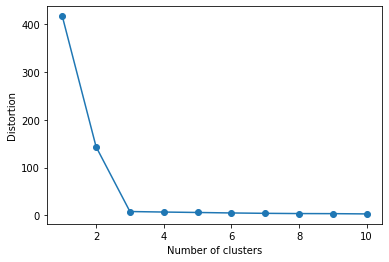

In [ ]:
distortions = []
for i in range(1,11):
  km = KMeans(
      n_clusters=i, init='random',
      n_init=10,max_iter=300,
      tol=1e-04, random_state=0
  )
  km.fit(X)
  distortions.append(km.inertia_)

#plot
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
# from kneed import KneeLocator
!pip install --upgrade kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
 from kneed import KneeLocator

In [ ]:
#Determining the elbow point in the SSE curve isn’t always straightforward. If you’re having trouble choosing the elbow point of the curve, then you could use a Python package, kneed, to identify the elbow point programmatically:
kl = KneeLocator(range(1,11),distortions, curve='convex',direction='decreasing')
kl.elbow

3

In [ ]:
silhouette_coefficients = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_coefficients.append(score)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

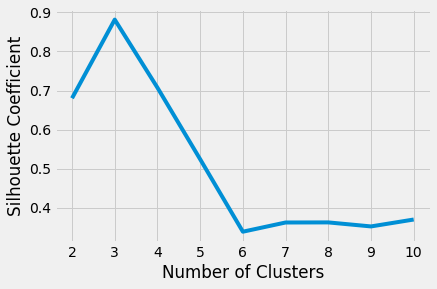

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


array([1], dtype=int32)

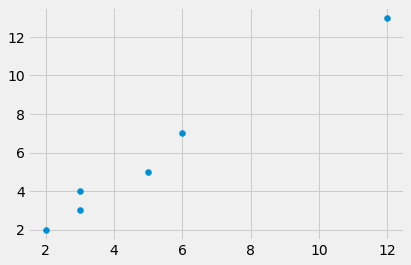

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
#x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
X1 = np.array([[2,2],[3,4],[6,7],[5,5],[3,3],[12,13]])
#X1.shape()
X2 = np.array([2,3,4])
plt.scatter(X1[:,0], X1[:,1])
centroid = np.array([[2,2],[3,4],[6,7]])
kmeans = KMeans(n_clusters=3, init=centroid).fit(X1)
kmeans.cluster_centers_
kmeans.labels_
#print("Number of iterations " , kmeans.n_iter_)
kmeans.predict([[8,8]])


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
#digits dataset from scikit learn consists of 8x8 pixel images of digits
#Data plotting and visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import scale
import time

In [ ]:
digits = load_digits() #load the dataset in digits

In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
digits.keys() #Dataset loaded is a dictionary
# data : flattened arrays/tensors used for clustering
# target : label associated with flattened array
# print(digits.target)
print(digits.data.size)
print(digits.keys())
print(digits.data)
print(digits.target)
print(digits.target.size)

115008
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
1797


In [ ]:
digits.data[0:3]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [ ]:
km = KMeans(n_clusters=10,random_state=0)
X = digits.data
Y = digits.target
y_km = km.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans_cluster = KMeans(init="random", n_clusters=10, n_init=10, random_state=0)
kmeans_cluster.fit(X)

KMeans(init='random', n_clusters=10, n_init=10, random_state=0)

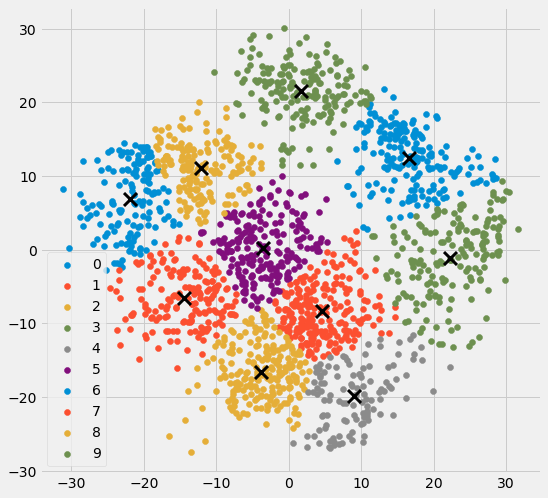

In [ ]:
from sklearn.decomposition import PCA
# Reducing the dataset
pca = PCA(2)
reduced_data = pca.fit_transform(X)
kmeans_cluster.fit(reduced_data)
  
# Calculating the centroids
centroids = kmeans_cluster.cluster_centers_
label = kmeans_cluster.fit_predict(reduced_data)
unique_labels = np.unique(label)
  
# plotting the clusters:
plt.figure(figsize=(8, 8))
for i in unique_labels:
    plt.scatter(reduced_data[label == i, 0],
                reduced_data[label == i, 1],
                label=i)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)
plt.legend()
plt.show()

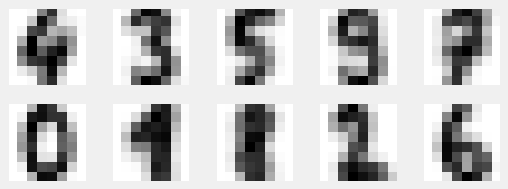

In [ ]:
fig, ax = plt.subplots(2, 5, figsize = (8,3)) #Create a figure and a set of␣subplots( 2 rows and 5 columns)
centers = km.cluster_centers_.reshape(10,8,8)
#flattened image can't be viewed, re-transform/reshape/inverse transform it to␣original form to view matrix shaped image
#reshape 10 rows of clusters (k_means.cluster_centers_ = 10,64) and 64 to 8 * 8␣matrix
for axi, center in zip(ax.flat, centers): #ax.flat:flattening the image &␣plotting relevant centers
  axi.set(xticks = [], yticks = [])
  axi.imshow(center, interpolation='nearest',cmap = plt.cm.binary)
#imshow(matplotlib method) to render the image in notebook

In [ ]:
labels = np.zeros_like(Y) # blank labels
print(f"The labels are : {labels}")
print(f"\nThe size of labels is : {labels.shape}")
print("The mask values are : ")
for i in range(10):
  mask = (Y == i)
#if a specific digit belongs to/equivalent a specific cluster then its True␣else False
print(mask)
labels[mask] = mode(digits.target[mask])[0]

The labels are : [0 0 0 ... 0 0 0]

The size of labels is : (1797,)
The mask values are : 
[False False False ... False  True False]


<ipython-input-28-cc2568b0c1e9>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


4. Use the k-means algorithm in python to cluster the following 8 examples into 3 clusters: A1=(2,10), A2=(2,5), A3=(8,4), A4=(5,8), A5=(7,5), A6=(6,4), A7=(1,2), A8=(4,9). (a) Suppose that the centers of each cluster are A1, A4 and A7. Run the k-means algorithm for 3 epochs only. At the end of this epoch show: i. The new clusters (i.e. the examples belonging to each cluster)(mention the appropriate attribute used to identify the clusters in sklearn) ii. The centers of the new clusters (mention the appropriate attribute used to identify the cluster centers in sklearn

In [ ]:
X = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
centroid = np.array(([[2,10],[5,8],[1,2]]))


<ipython-input-30-960bae040807>:2: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(centroid[:,0],centroid[:,1], c='red',marker='x',edgecolor='black',s=50)


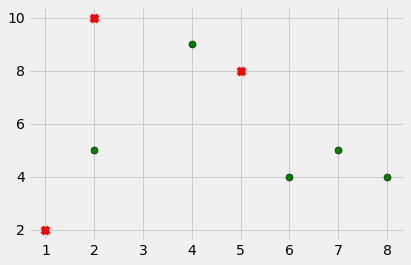

In [ ]:
plt.scatter(X[:,0],X[:,1], c='green',marker='o',edgecolor='black',s=50)
plt.scatter(centroid[:,0],centroid[:,1], c='red',marker='x',edgecolor='black',s=50)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init=centroid, max_iter=3).fit(X)
print("1st iteration center:\n", kmeans.cluster_centers_)


1st iteration center:
 [[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


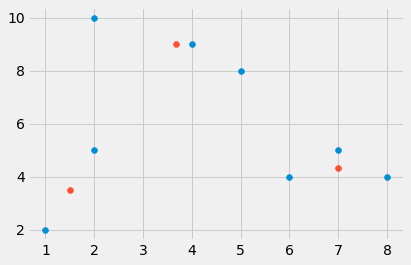

In [ ]:
center_itr_1 = kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1])
plt.scatter(center_itr_1[:,0], center_itr_1[:,1])


2nd iteration center:
 [[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


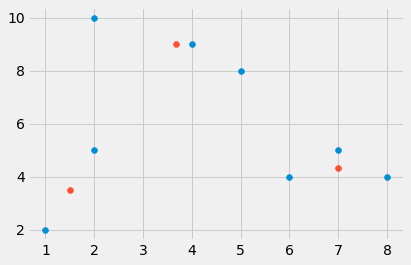

In [ ]:
kmeans = KMeans(n_clusters=3, init=center_itr_1, max_iter=3).fit(X)
print("\n2nd iteration center:\n", kmeans.cluster_centers_)

center_itr_2 = kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1])
plt.scatter(center_itr_2[:,0], center_itr_2[:,1])


3rd iteration center:
 [[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


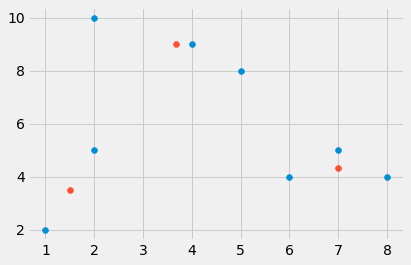

In [ ]:
kmeans = KMeans(n_clusters=3, init=center_itr_2, max_iter=3).fit(X)
print("\n3rd iteration center:\n", kmeans.cluster_centers_)

center_itr_3 = kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1])
plt.scatter(center_itr_3[:,0], center_itr_3[:,1])